In [1]:
from __future__ import division
import sys
import os
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import norm

In [123]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from event_selection import EventSelection

In [45]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [124]:
data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c = \
    EventSelection(data_tc0,data_tn0,data_mc0,data_mn0,data_ec0,data_en0,data_eg0,data_c0)

In [125]:
print(data_tc0.shape,data_tn0.shape,data_mc0.shape,data_mn0.shape,data_ec0.shape,data_en0.shape,data_eg0.shape,data_c0.shape)

(128278,) (27754,) (462405,) (54601,) (420185,) (72626,) (4267,) (246367,)


In [126]:
print(data_tc.shape,data_tn.shape,data_mc.shape,data_mn.shape,data_ec.shape,data_en.shape,data_eg.shape,data_c.shape)

(8311,) (47,) (330,) (105,) (66,) (62,) (20,) (245,)


In [82]:
def calc_effective_area(data, n_files, e_bins):
    energy = data['weight']['PrimaryNeutrinoEnergy']
    ow = data['weight']['OneWeight']
    n_gen = data['weight']['NEvents']*n_files
    unit = 10000 #cm2 to m2
    
    bin_widths = np.diff(e_bins)
    areas = ow/n_gen/unit
    
    areas[~np.isfinite(areas)] = 0
    bin_widths = np.diff(e_bins)
    eff_area = np.histogram(energy, bins=e_bins, weights=areas)[0] / (4*np.pi*bin_widths)

    return eff_area

In [102]:
e_bins = np.logspace(4, 8, 36)
effA_tc  = calc_effective_area(data_tc,1000,e_bins)
effA_tn  = calc_effective_area(data_tn,1000,e_bins)
effA_mc  = calc_effective_area(data_mc,1000,e_bins)
effA_mn  = calc_effective_area(data_mn,1000,e_bins)
effA_ec  = calc_effective_area(data_ec,1000,e_bins)
effA_en  = calc_effective_area(data_en,1000,e_bins)
effA_eg  = calc_effective_area(data_eg,1000,e_bins)

In [104]:
data_ecg = np.append(data_ec,data_eg, axis = 0)
effA_ecg  = calc_effective_area(data_ecg,1000,e_bins)

In [121]:
def plot_effA(data_tc,data_mc, data_ecg,e_bins):
    fig = plt.figure(figsize=(10, 5),facecolor ='w')
    bin_center = (e_bins[1:] + e_bins[:-1]) / 2
    bin_width = (e_bins[1:] - e_bins[:-1])
    plt.plot(bin_center, data_tc, drawstyle='steps-mid', color='C0')
    plt.errorbar(bin_center, data_tc,
                 xerr=bin_width / 2.,
                 label=r'$\nu_\tau$ CC',
                 fmt='.', markersize=0, color='C0')
    plt.plot(bin_center, data_mc, drawstyle='steps-mid', color='C1')
    plt.errorbar(bin_center, data_mc,
                 xerr=bin_width / 2.,
                 label=r'$\nu_\mu$ CC',
                 fmt='.', markersize=0, color='C1')
    plt.plot(bin_center, data_ecg, drawstyle='steps-mid', color='C2')
    plt.errorbar(bin_center, data_ecg,
                 xerr=bin_width / 2.,
                 label=r'$\nu_e$ CC + GR',
                 fmt='.', markersize=0, color='C2')
    
    x_nt, y_nt, x_nm, y_nm = get_values_dxu()
    plt.hlines([0.1,10],e_bins[0], e_bins[-1], ls = '--',lw =1)
    plt.plot(x_nt, y_nt, ls='--')
    plt.plot(x_nm, y_nm, ls='--')
    plt.plot([], [], color='k', ls='--', label='PRD93, 022001')
    plt.legend(loc='lower right')
    plt.xscale('log')
    plt.xlim(e_bins[0], e_bins[-1])
    plt.ylim(1e-3, 2e1)
    plt.yscale('log')
    plt.xlabel(r'$E_{\nu}$ / GeV', fontsize=14)
    plt.ylabel(r'$A_{\mathrm{eff}} \,\, / \,\, \mathrm{m}^2$', fontsize=14)

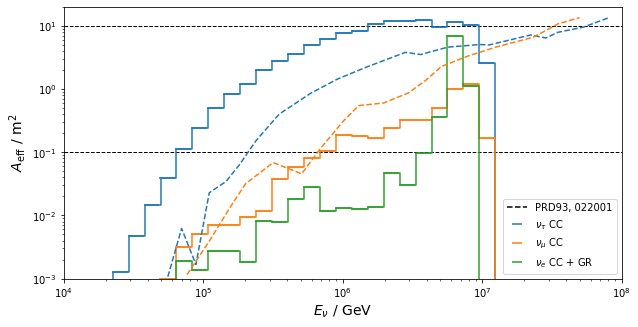

In [122]:
plot_effA(effA_tc,effA_mc,effA_ecg,e_bins)

In [108]:
def get_values_dxu():
    x_nt = np.array([55.665105802729066, 69.90737071572553, 88.51084082558611,110.25615087338332,145.39322492333739,181.11337767883057,\
                     238.83164656930262,350.08186286863247,589.2750063294868,921.858598704655,1502.0294408362583,2810.368382610614,\
                     3616.628388349924,5657.8336808935655,9601.34677378468,11206.499205226111,22196.768501844497,28564.747450948267,\
                     34724.503308461666,53012.90769813154,79626.9481069286]) * 1e3

    y_nt = [0.001071066691796889,0.006216958690606581,0.0016690796581416937,0.022792825476115407,0.03441099636300819,0.062829721927494,\
            0.15257600473579175,0.40106153269136574,0.8579979269537402,1.4472729954437362,2.255334737765349,3.8043041353757916,\
            3.514564837031013,4.600913164792588,5.059742791773757,4.9802105782494275,7.169759484676317,6.417109492481517,7.884769299482745,\
            9.535814588009819,13.300048081655166]

    x_nm = np.array([76.46389956352877,112.25089668095131,156.92107185967836,200.49762558681368,316.5090312258418,507.135129785287,\
                     686.0048337255963,998.5766826141124,1296.4484863405064,1963.4349788784716,2950.4051765283266,3924.565367735221,\
                     5094.774674291981,7909.199635455881,12683.822879769574,23169.316221559544,35105.61824453861,49823.46265257069]) * 1e3

    y_nm = [0.001154816251699624,0.004160535879843541,0.01384802378012066,0.031530620618842015,0.0685168743284543,0.04549991661473645,\
            0.11214122703180264,0.3039619806161653,0.5460255908071316,0.6012037412804498,0.8660111824977489,1.3709874780900013,\
            2.2756325561759714,3.330561796171081,4.649286624730341,6.596510014646347,10.783216157179035,13.470387420413273]
    return x_nt, y_nt, x_nm, y_nm